In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_altered = df_original.copy()

In [7]:
countries = ['Poland', 'Lithuania', 'Latvia', 'Estonia']
df_DA_PLBAL = df_altered[(df_altered['job_country'].isin(countries)) & (df_altered['job_title_short']=='Data Analyst')].copy()

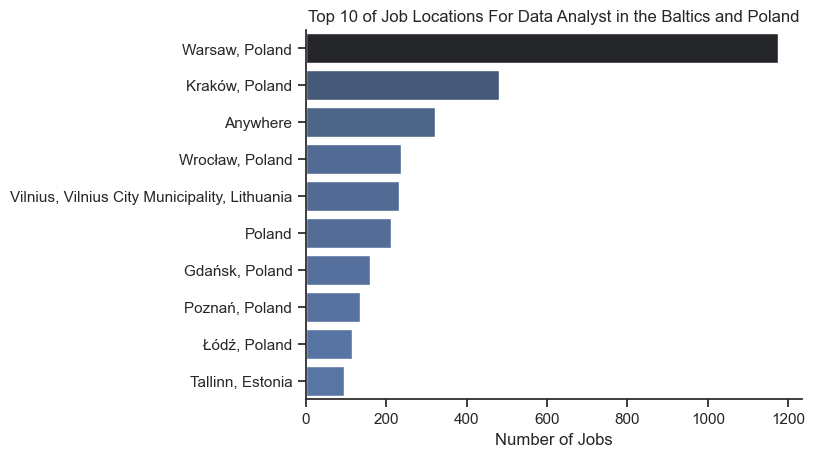

In [42]:
df_plot = df_DA_PLBAL['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 of Job Locations For Data Analyst in the Baltics and Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



JOS Opportunieties:

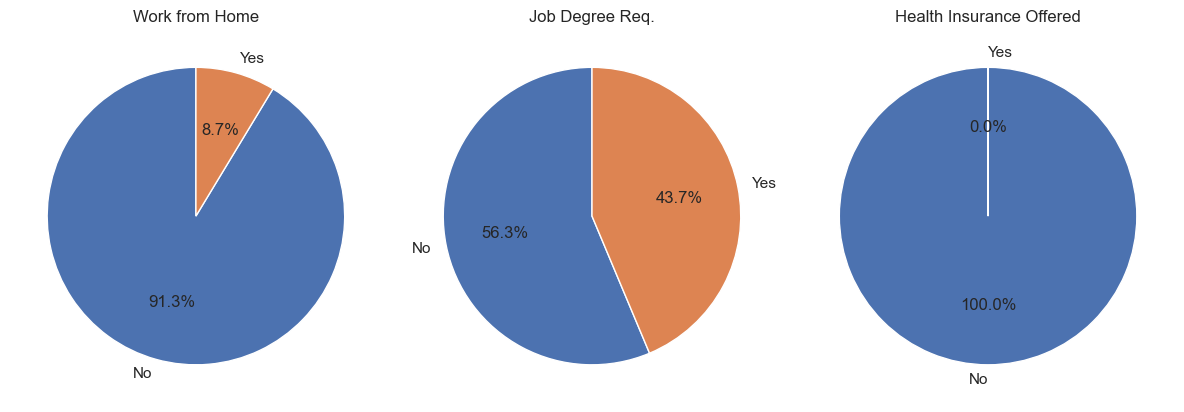

In [44]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))
dict_column = {
    'job_work_from_home': 'Work from Home', 
    'job_no_degree_mention': 'Job Degree Req.', 
    'job_health_insurance': 'Health Insurance Offered'
    }
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_PLBAL[column].value_counts(), startangle=90, autopct='%1.1f%%', labels = ['No', 'Yes'])
    ax[i].set_title(title)
fig.tight_layout()
plt.show()

Companies to Explore:

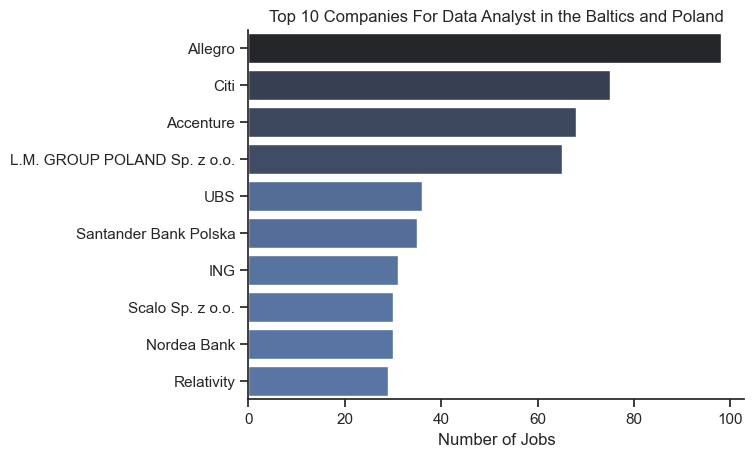

In [47]:
df_plot = df_DA_PLBAL['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Companies For Data Analyst in the Baltics and Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()